# Load Library and Dataset

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading dataset
mydata = pd.read_csv('adult-all.csv', header= None)
mydata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleansing

In [4]:
mydata.columns=["age","workclass","fnlwgt","education","educational_number",
                "marital_status","occupation","relationship","race","gender",
               "capital-gain","capital-loss","hours_per_week","native_country",
               "income"]
mydata.head()

,age,workclass,fnlwgt,education,educational_number,marital_status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
mydata.shape

(48842, 15)

In [6]:
mydata.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
educational_number     int64
marital_status        object
occupation            object
relationship          object
race                  object
gender                object
capital-gain           int64
capital-loss           int64
hours_per_week         int64
native_country        object
income                object
dtype: object

In [7]:
mydata.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational_number    0
marital_status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours_per_week        0
native_country        0
income                0
dtype: int64

In [8]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational_number,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [9]:
#Checking categorical variables
cato_vars = [x for x in mydata.columns if mydata[x].dtype =="object"]
cato_vars

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'income']

In [10]:
# Checking categorical variables
num_vars = [x for x in mydata.columns if x not in cato_vars]
num_vars

['age',
 'fnlwgt',
 'educational_number',
 'capital-gain',
 'capital-loss',
 'hours_per_week']

# Value Count Function

In [11]:
mydata['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
mydata['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
mydata['native_country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [14]:
mydata['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [15]:
mydata['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [16]:
mydata['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

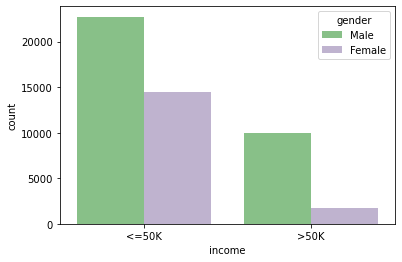

In [17]:
sns.countplot(mydata['income'], palette='Accent', hue='gender', data=mydata)

<AxesSubplot:xlabel='income', ylabel='count'>

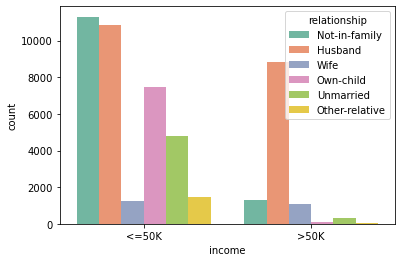

In [18]:
sns.countplot(mydata['income'], palette='Set2', hue='relationship', data=mydata)

# Filling ? vlaues

In [19]:
# Replacing all ? values with mode
mydata['workclass']=mydata['workclass'].replace('?','Private')
mydata['occupation']=mydata['occupation'].replace('?','Prof-specialty')
mydata['native_country']=mydata['native_country'].replace('?','United-States')


# Feature Engeering

In [20]:
#Education Category
mydata.education= mydata.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'school')
mydata.education= mydata.education.replace('HS-grad', 'highschool')
mydata.education= mydata.education.replace(['Assoc-voc', 'Assoc-acdm','Prof-school','Some-college'],'higher')
mydata.education= mydata.education.replace('Bachelors', 'undergrad')
mydata.education= mydata.education.replace('Masters', 'grad')
mydata.education= mydata.education.replace('Doctorate', 'doc')

mydata['education'].value_counts()

highschool    15784
higher        15374
undergrad      8025
school         6408
grad           2657
doc             594
Name: education, dtype: int64

In [21]:
#For Marital Status
mydata['marital_status']=mydata['marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'], 'married')
mydata['marital_status']=mydata['marital_status'].replace(['Never-married'], 'not-married')
mydata['marital_status']=mydata['marital_status'].replace(['Divorced','Separated', 'Widowed','Married-spouse-absent'],'other')

mydata['marital_status'].value_counts()

married        22416
not-married    16117
other          10309
Name: marital_status, dtype: int64

# Dummy Variables

In [22]:
#For Workclass
dummy_workclass=pd.get_dummies(mydata.workclass)

#For education
dummy_education=pd.get_dummies(mydata.education)

#For marital status
dummy_marital_status=pd.get_dummies(mydata.marital_status)

#For occupation
dummy_occupation=pd.get_dummies(mydata.occupation)

#For relationship
dummy_relationship = pd.get_dummies(mydata.relationship)

#For race
dummy_race = pd.get_dummies(mydata.race)

# For gender
dummy_gender = pd.get_dummies(mydata.gender)

# For native country
dummy_native_country = pd.get_dummies(mydata.native_country)



new_data = mydata.drop(["workclass","education","marital_status","occupation","relationship",
                      "race","gender","native_country"], axis=1)
new_data=pd.concat((new_data,dummy_workclass,dummy_education,dummy_marital_status,dummy_occupation,dummy_relationship,
                   dummy_race,dummy_gender,dummy_native_country), axis=1)
new_data.head()


,age,fnlwgt,educational_number,capital-gain,capital-loss,hours_per_week,income,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [23]:
# Creating X
x= new_data.drop("income", axis=1)
x.head()

,age,fnlwgt,educational_number,capital-gain,capital-loss,hours_per_week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Creating y
dummy_income = pd.get_dummies(mydata.income)
print(dummy_income)
y=dummy_income
y.head()

       <=50K  >50K
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
48837      1     0
48838      1     0
48839      1     0
48840      1     0
48841      0     1

[48842 rows x 2 columns]


,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
# Splitting data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
scaler = StandardScaler()
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_train.head()

,age,fnlwgt,educational_number,capital-gain,capital-loss,hours_per_week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
2037,0.829336,-0.123017,-1.583660,-0.144022,-0.215149,-0.190062,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4580,-1.214855,0.451659,-0.418577,-0.144022,-0.215149,-0.028403,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23109,-1.579889,0.245266,-1.195299,-0.144022,-0.215149,-0.028403,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
42111,-1.214855,-0.702039,-1.195299,-0.144022,-0.215149,-0.028403,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
37412,-0.922828,-0.921165,1.911589,-0.144022,-0.215149,3.204762,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Model with KNN

In [26]:
# Selecting the value of K
k=math.floor(math.sqrt(len(x_train.index)))
k

184

In [27]:
model = KNeighborsClassifier(n_neighbors=184)
model = model.fit(x_train,y_train)

In [28]:
##Transform on the test set
x_test[num_vars] = scaler.transform(x_test[num_vars])
pred = model.predict(x_test)

In [29]:
#Printing confusion matrix
confusion_matrix(y_test.values.argmax(axis=1), pred.argmax(axis=1))

array([[10364,   752],
       [ 1561,  1976]], dtype=int64)

In [30]:
#Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11116
           1       0.72      0.56      0.63      3537

   micro avg       0.84      0.84      0.84     14653
   macro avg       0.80      0.74      0.77     14653
weighted avg       0.84      0.84      0.83     14653
 samples avg       0.84      0.84      0.84     14653



In [31]:
# Printing Accuracy
print(accuracy_score(y_test, pred))

0.8401692486180304
